In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Create the path to csv files. Change the path to the csv files to for your own use
path = "C:/Users/josch/OneDrive/Desktop/Udacity/"
ldf = pd.read_csv(path + 'listings.csv')
rdf = pd.read_csv(path + 'reviews.csv')
cdf = pd.read_csv(path + 'calendar.csv')

In [7]:
#get a first look at the listings data
ldf.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


### The first question will be to determine popular neighborhoods based on the total number of listings in a given neighborhood. Airbnb has provided clean data for the neighborhood listings, thus there are no missing values.

Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Name: neighbourhood_cleansed, dtype: int64

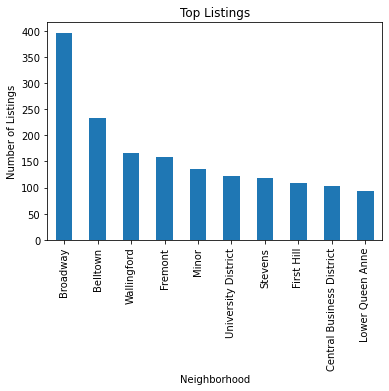

In [3]:
listings_per_neighborhood = ldf['neighbourhood_cleansed'].value_counts()
listings_per_neighborhood[:10].plot(kind="bar", title="Top Listings", xlabel="Neighborhood", ylabel="Number of Listings")

listings_per_neighborhood.head(10)

### The second question will be to determine the most popular listing. Popular listings are determined by the number of reviews given for that listing. Rather than show the listing_id, I have determined the listing_name from the given id. This helps understand the property better.

In [8]:
#get a first look at the review data
rdf.head()

0    7202016
1    7202016
2    7202016
3    7202016
4    7202016
Name: listing_id, dtype: int64

,listing_id,reviews,listing_name
0,208356,474,contemporary art loft downtown [7]
1,365550,466,contemporary art loft downtown [17]
2,25002,404,"Beautiful, Quiet, Friendly Ballard"
3,47196,353,Capitol Hill Suite + Free Parking
4,63308,320,Guest Studio - North Capitol Hill
5,92835,319,"Charming Apt, VERY Central Location"
6,5682,297,"Cozy Studio, min. to downtown -WiFi"
7,279063,294,"Central Guest Room, Stunning View"
8,53867,287,U District Backyard Cottage & Loft
9,841049,279,Volunteer Park Room 2


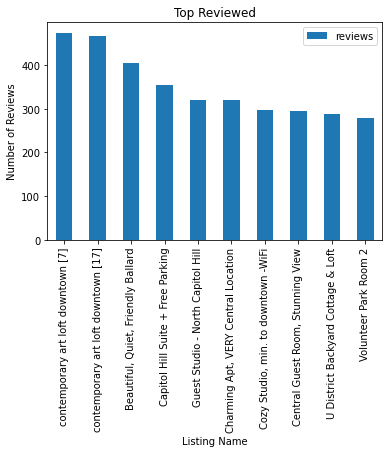

In [4]:
rdf = rdf['listing_id']
top_reviewed = rdf.value_counts(ascending=False).reset_index()
top_reviewed.rename(columns={'index': 'listing_id', 'listing_id': 'reviews'}, inplace=True)

name_column =[] #This array is used to match the listing_id with the listing name.

for i in range(len(top_reviewed)):
    name_column.append(((ldf['name'].where(ldf['id'] == top_reviewed['listing_id'][i]).dropna())).iloc[0])
    
top_reviewed = top_reviewed.assign(listing_name=name_column)
top_reviewed[:10].plot(x='listing_name', y='reviews', kind="bar", title="Top Reviewed", xlabel="Listing Name", ylabel="Number of Reviews")

top_reviewed.head(10)

### The third question will be to determine the most expensive neighborhoods. This can help guests determine the right neighborhood for their price range.

In [5]:
#check to see if there any missing prices as this could skew the results.

missing_prices = ldf['price'].isnull().sum()/ldf.shape[0]

if missing_prices == 0:
    print("No missing price data")
else:
    print(missing_prices)

No missing price data


neighbourhood_cleansed
Southeast Magnolia     231.705882
Portage Bay            227.857143
Westlake               194.470588
West Queen Anne        187.769231
Montlake               182.789474
Briarcliff             176.571429
Sunset Hill            176.055556
Industrial District    173.333333
Alki                   171.619048
Windermere             169.900000
Name: price, dtype: float64

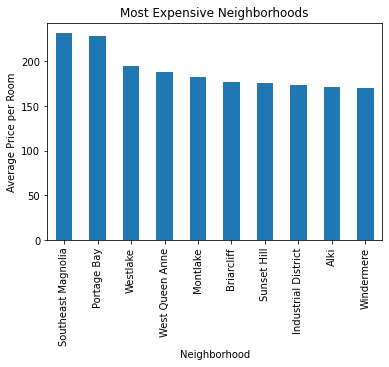

In [6]:
#Airbnb price data is a string. We need to convert this to a float to perform computations on the price.
ldf['price'] = ldf['price'].str.replace("[$, ]", "", regex=True).astype("float")

#Group the data by neighborhood then find the average price per room according to that grouping.
average_neighborhood_price = ldf.groupby(['neighbourhood_cleansed']).mean()['price'].sort_values(ascending=False)
average_neighborhood_price[:10].plot(kind="bar", title="Most Expensive Neighborhoods", xlabel="Neighborhood", ylabel="Average Price per Room")

average_neighborhood_price.head(10)